# ***Projet analyse de données : Sondage FST*** 
# Réalisé par : 
- #  EL BCIR Abdelhadi : IRISI2
- #  AHTOUTE Wissam : IFA2


# Importation des librairies 



In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('bmh')
from pandas_datareader import data as pdr

# Importation du dataset

In [10]:
#import the data and read it using pandas
df = pd.read_excel("FST Sondage.xlsx")
df = pd.DataFrame(df)
df

,Timestamp,Sexe,Votre formation,Niveau_detude,nationalite,apres_diplome,traget,cours,entourage_age,entourage_niveo,...,travailler_dur_pas_intelligent,essayer_choses_difficiles,erreur_honte_gene,Jaim_dise_intelligent,abandonne_difficile,erreur_apprendre,jamais_doe,aprendre_sitravail_dure,changer_inteligence,faire_mon_best
0,2024-05-06 15:35:50,Masculin,Ingénieur,BAC+4,Non,Travailler dans le privé,Moins de 15,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,FAUX,VRAI,Faux,Faux,FAUX,VRAI,Faux,VRAI,Faux,VRAI
1,2024-05-06 15:41:10,Féminin,Ingénieur,BAC+4,"Oui, seulement celle-ci",Travailler dans le public,entre 15 et 30,Assez régulièrement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,VRAI,VRAI,VRAI,VRAI,FAUX,VRAI,Faux,VRAI,VRAI,VRAI
2,2024-05-06 16:05:09,Masculin,Ingénieur,BAC+4,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 15 et 30,Systématiquement,d’âges différents,issus de différents niveaux d’études,...,FAUX,Faux,VRAI,VRAI,VRAI,VRAI,Faux,FAUX,VRAI,VRAI
3,2024-05-06 16:12:02,Masculin,Ingénieur,BAC+4,Non,Créer mon entreprise,entre 15 et 30,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,FAUX,VRAI,Faux,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI
4,2024-05-06 16:13:49,Masculin,Tronc commun,BAC+1,Oui et une autre ou d’autres nationalité(s),Je ne sais pas,entre 30 et 45,Assez régulièrement,d’âges différents,ayant le même niveau d’études que vous,...,FAUX,VRAI,VRAI,Faux,VRAI,Faux,VRAI,FAUX,VRAI,Faux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2024-05-07 00:47:02,Féminin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 45 et 60,Systématiquement,d’âges différents,ayant le même niveau d’études que vous,...,FAUX,Faux,Faux,VRAI,FAUX,VRAI,VRAI,VRAI,Faux,VRAI
124,2024-05-07 01:41:52,Masculin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 45 et 60,Assez régulièrement,ayant globalement le même âge que vous,de niveau supérieur,...,FAUX,VRAI,VRAI,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI
125,2024-05-07 03:13:09,Féminin,LST,BAC+1,"Oui, seulement celle-ci",Travailler dans le privé,entre 15 et 30,Assez régulièrement,plus âgé(e)s que vous,de niveau supérieur,...,FAUX,VRAI,Faux,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI
126,2024-05-07 11:11:11,Féminin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,Moins de 15,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,FAUX,VRAI,Faux,VRAI,FAUX,VRAI,VRAI,FAUX,VRAI,VRAI


# Analyse de fréquence


## Répartition Masculin-féminin 

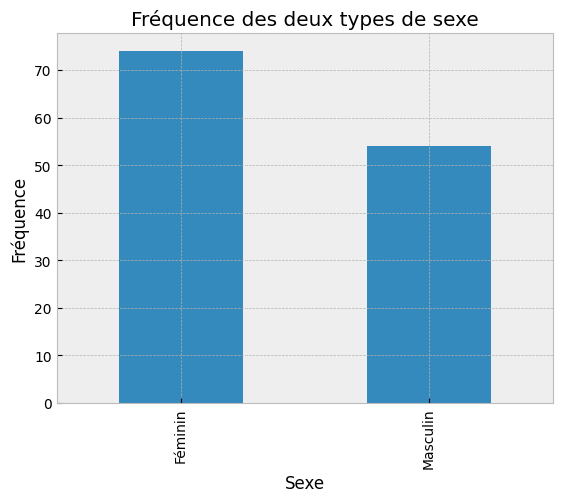

In [11]:
# Compte le nombre d'occurrences de chaque valeur dans la colonne 'Sexe' du dataframe 'df' et trace un graphique en barres
df['Sexe'].value_counts().plot(kind='bar')

# Définit l'étiquette de l'axe des abscisses
plt.xlabel('Sexe')

# Définit l'étiquette de l'axe des ordonnées
plt.ylabel('Fréquence')

# Définit le titre du graphique
plt.title('Fréquence des deux types de sexe')

# Affiche le graphique
plt.show()


## Répartition de la formation

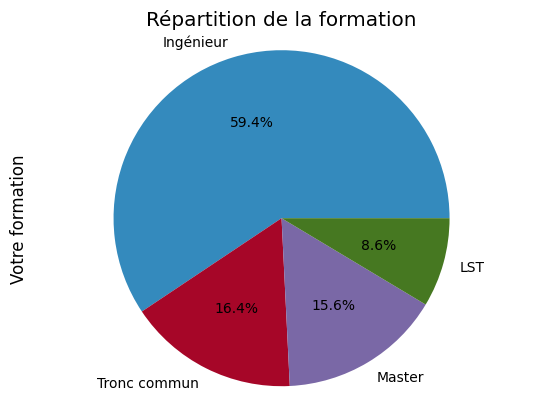

In [31]:
# Compte le nombre d'occurrences de chaque valeur dans la colonne 'Votre formation' du dataframe 'df' et trace un graphique en camembert
df['Votre formation'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Définit le titre du graphique
plt.title('Répartition de la formation')

# Ajuste les proportions du graphique pour qu'il apparaisse comme un cercle
plt.axis('equal')

# Affiche le graphique
plt.show()


# Traitement de personnalité 

## Ajout de colonne score et personnalité

In [32]:
import pandas as pd

# Définit une fonction appelée 'determine_personality' qui prend un score en entrée et retourne une personnalité basée sur ce score
def determine_personality(score):
    if score > 5:
        return "fixe"
    else:
        return "croissant"

# Définit une fonction appelée 'calculate_score' qui prend une ligne en entrée et calcule un score en fonction de cette ligne
def calculate_score(row):
    fixed_combination = ["VRAI", "FAUX", "VRAI", "VRAI", "VRAI", "FAUX", "VRAI", "VRAI", "VRAI", "FAUX"]
    row = [value.upper() for value in row]  # Convert all values to uppercase for comparison
    score = sum([1 for i in range(len(row)) if row[i] == fixed_combination[i]])
    return score

# Sélectionne les colonnes souhaitées
columns_to_analyze = ["travailler_dur_pas_intelligent", "essayer_choses_difficiles", "erreur_honte_gene", "Jaim_dise_intelligent", "abandonne_difficile", "erreur_apprendre", "jamais_doe", "aprendre_sitravail_dure", "changer_inteligence", "faire_mon_best"]
df_selected = df[columns_to_analyze]

# Calcule le score pour chaque ligne dans les colonnes sélectionnées
scores = df_selected.apply(calculate_score, axis=1)

# Détermine la personnalité en fonction du score
personalities = scores.apply(determine_personality)

# Ajoute les colonnes 'score' et 'personality' au dataframe original 'df'
df['score'] = scores
df['personality'] = personalities

# Affiche le dataframe mis à jour
df

,Timestamp,Sexe,Votre formation,Niveau_detude,nationalite,apres_diplome,traget,cours,entourage_age,entourage_niveo,...,erreur_honte_gene,Jaim_dise_intelligent,abandonne_difficile,erreur_apprendre,jamais_doe,aprendre_sitravail_dure,changer_inteligence,faire_mon_best,score,personality
0,2023-04-25 20:20:50.315,Masculin,Ingénieur,BAC+4,Non,Travailler dans le privé,Moins de 15,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,Faux,Faux,FAUX,VRAI,Faux,VRAI,Faux,VRAI,1,croissant
1,2023-04-25 20:27:17.687,Féminin,Ingénieur,BAC+4,"Oui, seulement celle-ci",Travailler dans le public,entre 15 et 30,Assez régulièrement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,VRAI,VRAI,FAUX,VRAI,Faux,VRAI,VRAI,VRAI,5,croissant
2,2023-04-25 20:33:04.467,Masculin,Ingénieur,BAC+4,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 15 et 30,Systématiquement,d’âges différents,issus de différents niveaux d’études,...,VRAI,VRAI,VRAI,VRAI,Faux,FAUX,VRAI,VRAI,5,croissant
3,2023-04-25 21:38:08.318,Masculin,Ingénieur,BAC+4,Non,Créer mon entreprise,entre 15 et 30,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,Faux,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI,2,croissant
4,2023-04-25 22:04:03.648,Masculin,Tronc commun,BAC+1,Oui et une autre ou d’autres nationalité(s),Je ne sais pas,entre 30 et 45,Assez régulièrement,d’âges différents,ayant le même niveau d’études que vous,...,VRAI,Faux,VRAI,Faux,VRAI,FAUX,VRAI,Faux,6,fixe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2023-05-10 21:20:59.279,Féminin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 45 et 60,Systématiquement,d’âges différents,ayant le même niveau d’études que vous,...,Faux,VRAI,FAUX,VRAI,VRAI,VRAI,Faux,VRAI,4,croissant
124,2023-05-12 16:43:08.853,Masculin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 45 et 60,Assez régulièrement,ayant globalement le même âge que vous,de niveau supérieur,...,VRAI,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI,3,croissant
125,2023-05-14 12:10:45.541,Féminin,LST,BAC+1,"Oui, seulement celle-ci",Travailler dans le privé,entre 15 et 30,Assez régulièrement,plus âgé(e)s que vous,de niveau supérieur,...,Faux,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI,2,croissant
126,2023-05-14 12:22:59.300,Féminin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,Moins de 15,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,Faux,VRAI,FAUX,VRAI,VRAI,FAUX,VRAI,VRAI,3,croissant


# Les tests 2D

## Analyse de la relation entre formation et parcours aprés diplome en utilisant table de contingence

In [12]:
# Crée une table de contingence à partir des colonnes 'apres_diplome' et 'Votre formation' du dataframe 'df' en %
contingency_table = pd.crosstab(df['apres_diplome'], df['Votre formation'])
contingency_coefficient = contingency_table.apply(lambda r: r / r.sum(), axis=1)
print('Coefficient de contingence :')
print(contingency_coefficient)


Coefficient de contingence :
Votre formation                                Ingénieur       LST    Master  \
apres_diplome                                                                  
Continuer dans un autre parcours de formation   0.342105  0.157895  0.131579   
Créer mon entreprise                            0.800000  0.066667  0.133333   
Je ne sais pas                                  0.352941  0.117647  0.176471   
Travailler dans le privé                        0.795455  0.022727  0.181818   
Travailler dans le public                       0.714286  0.071429  0.142857   

Votre formation                                Tronc commun  
apres_diplome                                                
Continuer dans un autre parcours de formation      0.368421  
Créer mon entreprise                               0.000000  
Je ne sais pas                                     0.352941  
Travailler dans le privé                           0.000000  
Travailler dans le public             

## Analyse de la relation entre sexe et la présence en utilisant table de contingence

In [13]:
# Crée une table de contingence à partir des colonnes 'Sexe' et 'cours' du dataframe 'df'
contingency_table = pd.crosstab(df['Sexe'], df['cours'])
contingency_coefficient = contingency_table.apply(lambda r: r / r.sum(), axis=1)
print('Coefficient de contingence :')
print(contingency_coefficient)


Coefficient de contingence :
cours     Assez régulièrement  Rarement  Systématiquement
Sexe                                                     
Féminin              0.148649  0.081081          0.770270
Masculin             0.314815  0.037037          0.648148


## Analyse de la relation entre personnalité et la formation en utilisant table de contingence

In [35]:
# Crée une table de contingence à partir des colonnes 'personality' et 'Votre formation' du dataframe 'df'
contingency = pd.crosstab(df['personality'], df['Votre formation'])
print(contingency)

# Affiche la table de contingence
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency)

# Effectue le test du chi-deux sur la table de contingence
# Renvoie les résultats : la statistique chi-deux, la valeur p, les degrés de liberté et les fréquences attendues
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Votre formation  Ingénieur  LST  Master  Tronc commun
personality                                          
croissant               70   10      20            20
fixe                     6    1       0             1
Chi-square statistic: 1.9150907571960203
P-value: 0.5902155658041921
Degrees of freedom: 3
Expected frequencies: [[71.25   10.3125 18.75   19.6875]
 [ 4.75    0.6875  1.25    1.3125]]


# Analyse des correspondances multiples (ACM) 

## ACM en utilisant les variables : Sexe , Formation et les pratiques mises en œuvre

In [36]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import prince
import seaborn as sns
import matplotlib.pyplot as plt
from prince import plot

# Load the dataset
# Select the columns for MCA
mca_cols = ['Sexe', 'Votre formation', 'Noter_cours', 'information_complimentaire', 'reviser_cours', 'resumer_cours', 'faire_exercices', 'Poser_questions', 'Travailler_examens', 'rendez_vous_enseignant', 'faire_autre_exercices']
# Création de l'objet mca
# Subset the data with the selected columns
# Création de l'objet mca
mca_data = df[mca_cols]
mca_data = mca_data.replace({
    'jamais': 'jamais',
    'Presque tous les jours': 'tjrs',
    'Environ une fois par semaine': '1fois_sem',
    'Plusieurs fois par semaine': 'plus_foix_sem',
    'Une fois ou deux': '1_ou_2'
})

mca = prince.MCA()
# Lancement de l'ACM sur le jeu de données
mca = mca.fit(mca_data)
fig, ax = plt.subplots(figsize=(50, 50))

# Tracage des axes
ax = plot.stylize_axis(ax)

# Affichage des profils lignes sur deux dimensions
# alpha pour la transparence 
row_coords = mca.row_coordinates(mca_data)
ax.scatter(
    row_coords.iloc[:, 0],
    row_coords.iloc[:, 1],
    s=30,  # Increase the size of the points
    label=None,
    color=plot.GRAY['dark'],
    alpha=0.6
)

# Profils colonnes
col_coords = mca.column_coordinates(mca_data)
x = col_coords[0]
y = col_coords[1]

# Extraction des préfixes à l'aide map et de lambda
prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

# Mapping of modalities to desired labels
modality_map = {
    'jamais': 'jamais',
    'Presque tous les jours': 'tjrs',
    'Environ une fois par semaine': '1fois_sem',
    'Plusieurs fois par semaine': 'plus_foix_sem',
    'Une fois ou deux': '1_ou_2'
}

# Affichage des profils colonnes avec leurs modalités
for prefix in prefixes.unique():
    mask = prefixes == prefix
    
    ax.scatter(x[mask], y[mask], s=30, label=prefix)  # Increase the size of the points

    for i, label in enumerate(col_coords[mask].index):
        # Map modalities to desired labels if available, else use original label
        modality_label = modality_map.get(label, label)
        ax.annotate(modality_label, (x[mask][i], y[mask][i]))

# Ajout de légende
ax.legend()
            
ax.set_title('Row and column principal coordinates')
ei = [eig / mca.total_inertia_ for eig in mca.eigenvalues_]
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(0, 100 * ei[0]))
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(1, 100 * ei[1]))

# Save the graph as a picture
plt.savefig('graph.png')


NameError: name 'df' is not defined

## ACM en utilisant les variables : Sexe , Formation , Parcours aprés diplome , Entourage age , Entourage niveau et Integration

Text(0, 0.5, 'Component 1 (9.69% inertia)')

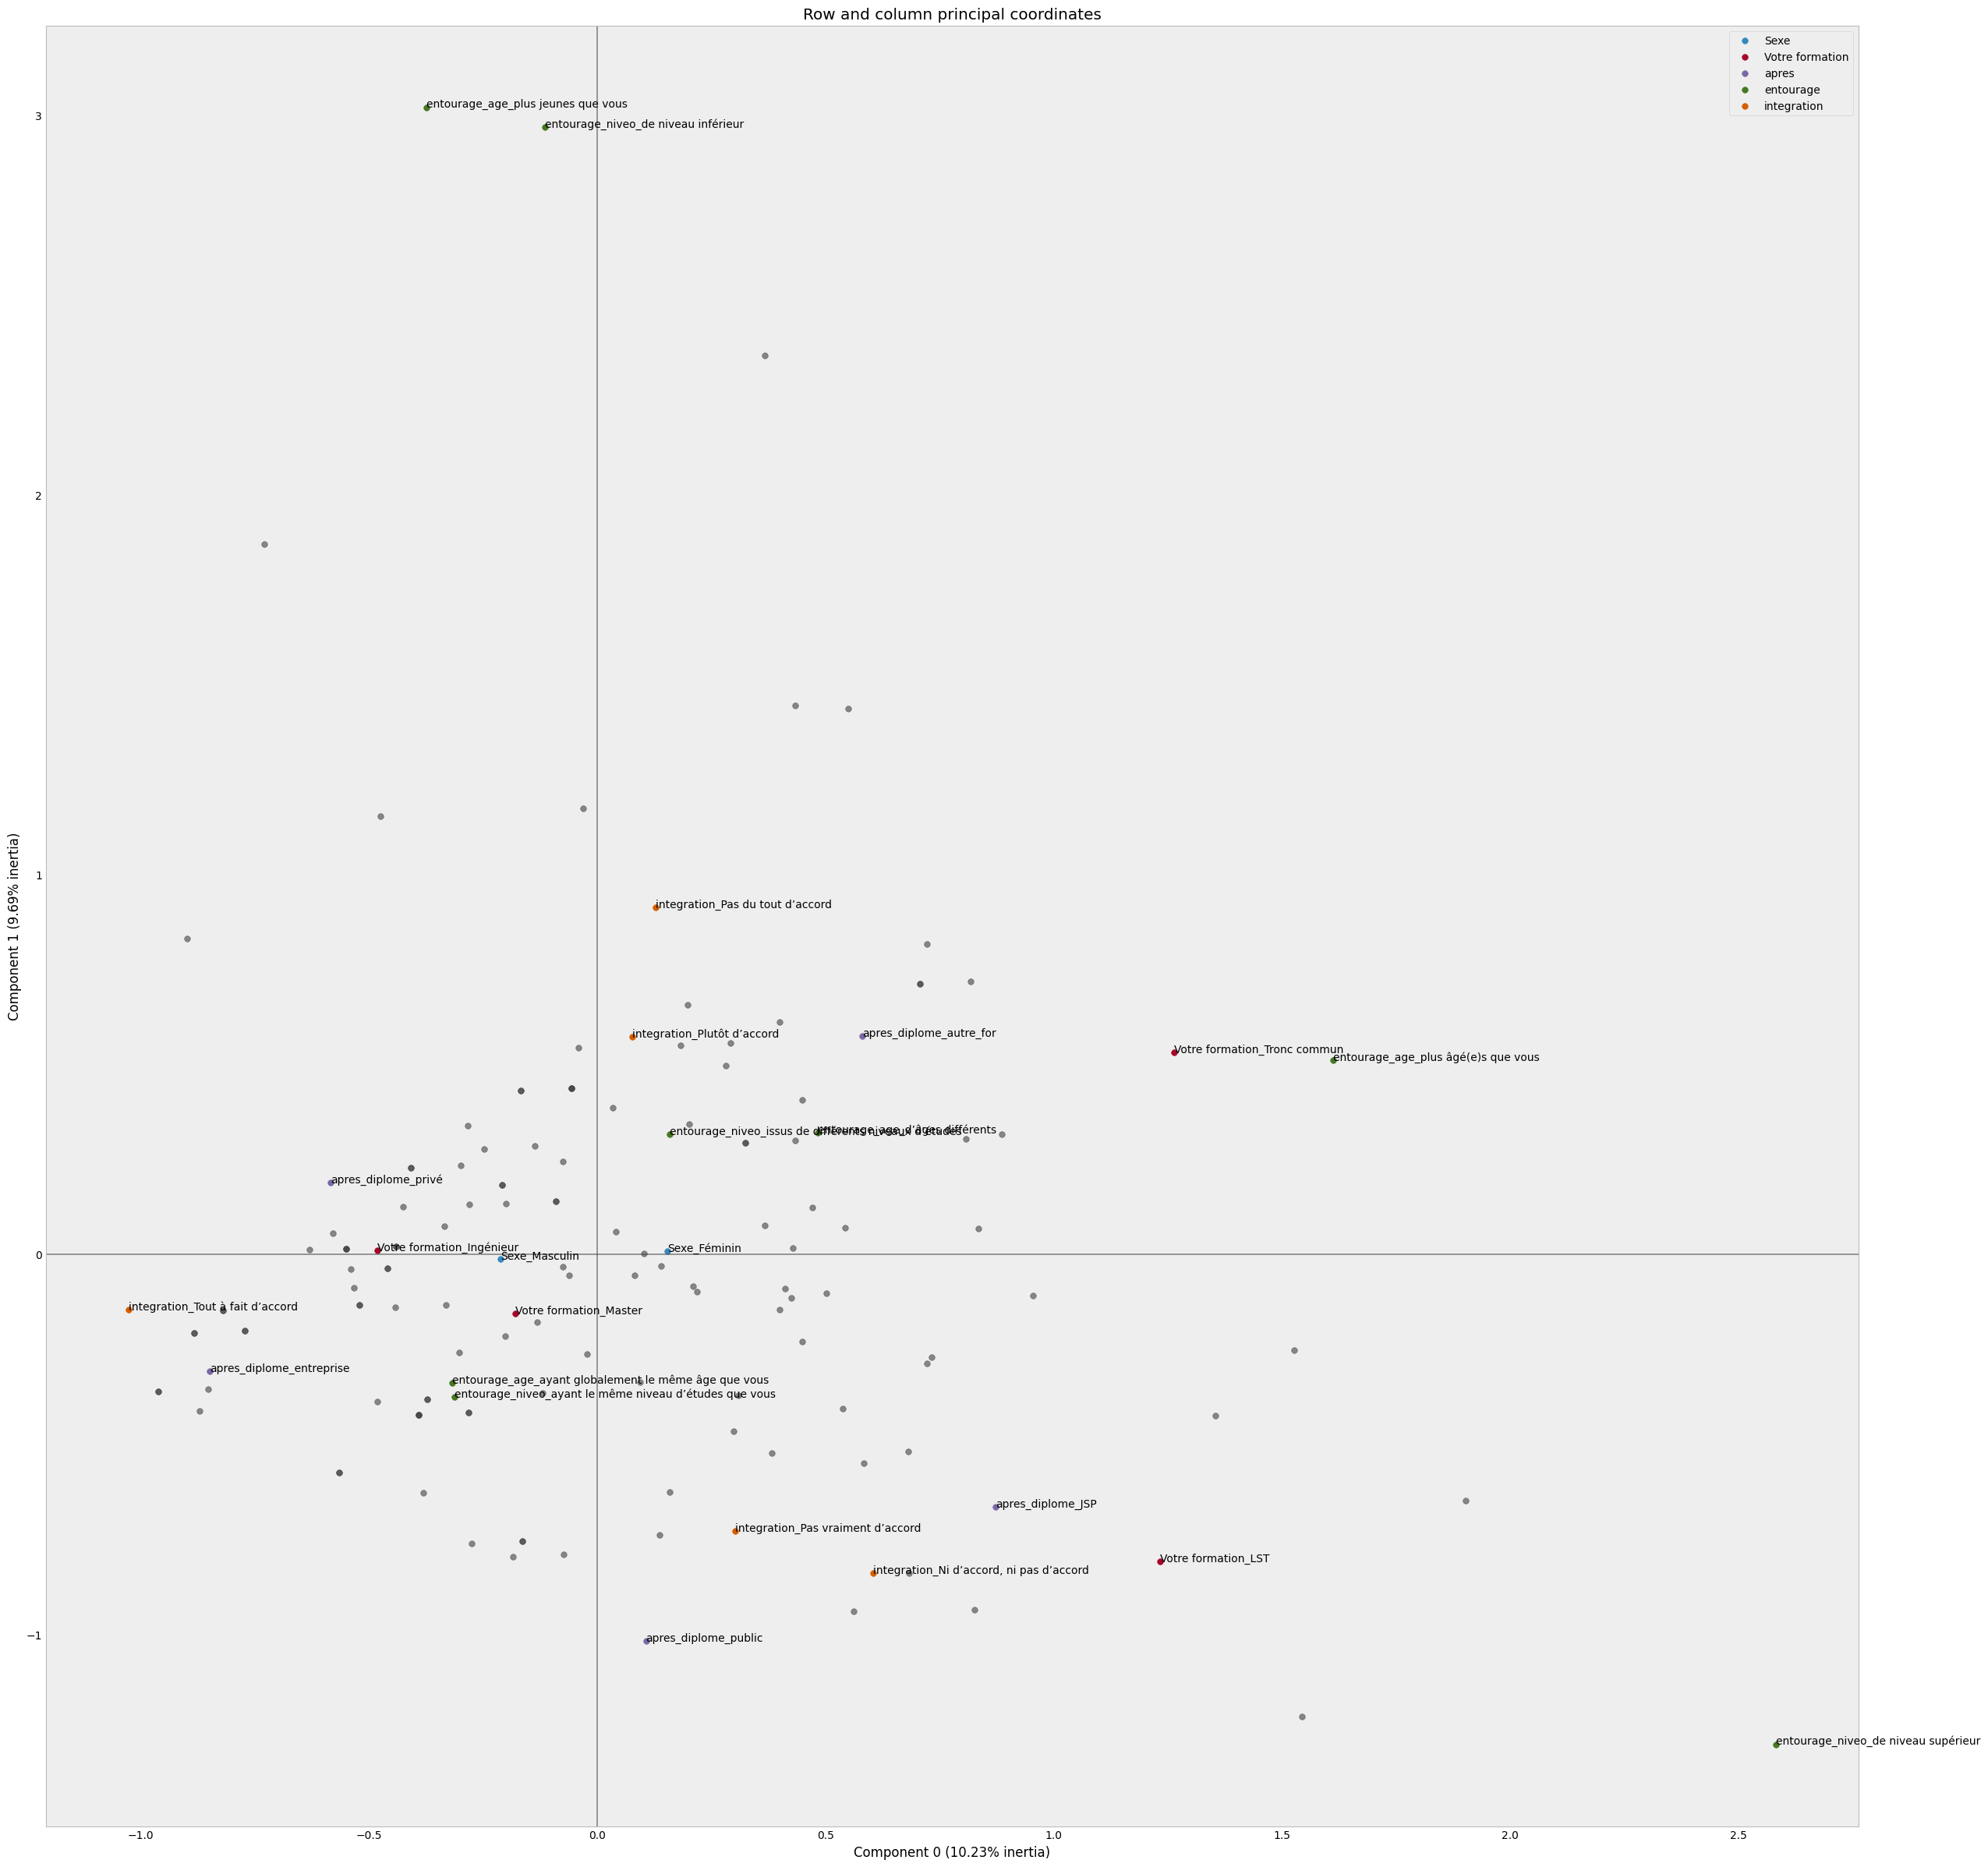

In [38]:
import pandas as pd
import prince
import seaborn as sns
import matplotlib.pyplot as plt
from prince import plot

# Load the dataset
# Select the columns for MCA
mca_cols = ['Sexe', 'Votre formation', 'apres_diplome', 'entourage_age', 'entourage_niveo', 'integration']
# Création de l'objet mca
# Subset the data with the selected columns
# Création de l'objet mca
mca_data = df[mca_cols]
mca_data = mca_data.replace({
    'Continuer dans un autre parcours de formation': 'autre_for',
    'Travailler dans le public': 'public',
    'Travailler dans le privé': 'privé',
    'Créer mon entreprise': 'entreprise',
    'Je ne sais pas': 'JSP',
    'Ayant le même niveau d’étude que vous':'mm_age',
    'De niveau inférieur':'nv_inf',
    'niveau supérieur':'nv_sup',
    'Redoublants':'redb',
    'Issus de différents niveaux d’études':'dif_et'
})
mca = prince.MCA()
# Lancement de l'ACM sur le jeu de données
mca = mca.fit(mca_data)
fig, ax = plt.subplots(figsize=(30, 30))

# Tracage des axes
ax = plot.stylize_axis(ax)

# Affichage des profils lignes sur deux dimensions
# alpha pour la transparence 
row_coords = mca.row_coordinates(mca_data)
ax.scatter(
    row_coords.iloc[:, 0],
    row_coords.iloc[:, 1],
    s=30,  # Increase the size of the points
    label=None,
    color=plot.GRAY['dark'],
    alpha=0.6
)

# Profils colonnes
col_coords = mca.column_coordinates(mca_data)
x = col_coords[0]
y = col_coords[1]

# Extraction des préfixes à l'aide map et de lambda
prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

# Mapping of modalities to desired labels
modality_map = {
    'jamais': 'jamais',
    'Presque tous les jours': 'tjrs',
    'Environ une fois par semaine': '1fois_sem',
    'Plusieurs fois par semaine': 'plus_foix_sem',
    'Une fois ou deux': '1_ou_2'
}

# Affichage des profils colonnes avec leurs modalités
for prefix in prefixes.unique():
    mask = prefixes == prefix
    
    ax.scatter(x[mask], y[mask], s=30, label=prefix)  # Increase the size of the points

    for i, label in enumerate(col_coords[mask].index):
        # Map modalities to desired labels if available, else use original label
        modality_label = modality_map.get(label, label)
        ax.annotate(modality_label, (x[mask][i], y[mask][i]))

# Ajout de légende
ax.legend()
            
ax.set_title('Row and column principal coordinates')
ei = [eig / mca.total_inertia_ for eig in mca.eigenvalues_]
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(0, 100 * ei[0]))
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(1, 100 * ei[1]))



In [39]:
df

,Timestamp,Sexe,Votre formation,Niveau_detude,nationalite,apres_diplome,traget,cours,entourage_age,entourage_niveo,...,erreur_honte_gene,Jaim_dise_intelligent,abandonne_difficile,erreur_apprendre,jamais_doe,aprendre_sitravail_dure,changer_inteligence,faire_mon_best,score,personality
0,2023-04-25 20:20:50.315,Masculin,Ingénieur,BAC+4,Non,Travailler dans le privé,Moins de 15,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,Faux,Faux,FAUX,VRAI,Faux,VRAI,Faux,VRAI,1,croissant
1,2023-04-25 20:27:17.687,Féminin,Ingénieur,BAC+4,"Oui, seulement celle-ci",Travailler dans le public,entre 15 et 30,Assez régulièrement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,VRAI,VRAI,FAUX,VRAI,Faux,VRAI,VRAI,VRAI,5,croissant
2,2023-04-25 20:33:04.467,Masculin,Ingénieur,BAC+4,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 15 et 30,Systématiquement,d’âges différents,issus de différents niveaux d’études,...,VRAI,VRAI,VRAI,VRAI,Faux,FAUX,VRAI,VRAI,5,croissant
3,2023-04-25 21:38:08.318,Masculin,Ingénieur,BAC+4,Non,Créer mon entreprise,entre 15 et 30,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,Faux,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI,2,croissant
4,2023-04-25 22:04:03.648,Masculin,Tronc commun,BAC+1,Oui et une autre ou d’autres nationalité(s),Je ne sais pas,entre 30 et 45,Assez régulièrement,d’âges différents,ayant le même niveau d’études que vous,...,VRAI,Faux,VRAI,Faux,VRAI,FAUX,VRAI,Faux,6,fixe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2023-05-10 21:20:59.279,Féminin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 45 et 60,Systématiquement,d’âges différents,ayant le même niveau d’études que vous,...,Faux,VRAI,FAUX,VRAI,VRAI,VRAI,Faux,VRAI,4,croissant
124,2023-05-12 16:43:08.853,Masculin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,entre 45 et 60,Assez régulièrement,ayant globalement le même âge que vous,de niveau supérieur,...,VRAI,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI,3,croissant
125,2023-05-14 12:10:45.541,Féminin,LST,BAC+1,"Oui, seulement celle-ci",Travailler dans le privé,entre 15 et 30,Assez régulièrement,plus âgé(e)s que vous,de niveau supérieur,...,Faux,Faux,FAUX,VRAI,VRAI,VRAI,Faux,VRAI,2,croissant
126,2023-05-14 12:22:59.300,Féminin,Tronc commun,BAC+1,"Oui, seulement celle-ci",Continuer dans un autre parcours de formation,Moins de 15,Systématiquement,ayant globalement le même âge que vous,ayant le même niveau d’études que vous,...,Faux,VRAI,FAUX,VRAI,VRAI,FAUX,VRAI,VRAI,3,croissant


##  Calcul des coordonnées individuelles des observations dans l'analyse MCA

In [40]:
# Obtient les noms des variables à partir des colonnes de 'mca_data'
variables = mca_data.columns

# Calcule les coordonnées des individus dans l'espace factoriel
coordonnees_individues = mca.row_coordinates(mca_data[variables])

# Affiche les coordonnées des individus
coordonnees_individues

,0,1
0,-0.882047,-0.207555
1,-0.073557,-0.788939
2,0.183072,0.551102
3,-0.961757,-0.361036
4,0.721828,-0.287717
...,...,...
123,0.834733,0.067663
124,1.354503,-0.424725
125,1.526625,-0.252737
126,0.434456,0.300585


# Kmeans

In [41]:
from sklearn.cluster import KMeans

# Préparation des données pour la classification
X = coordonnees_individues  # Variables prédictives (coordonnées des individus dans l'espace MCA)


# Création d'une instance de l'algorithme K-means avec le nombre de clusters souhaité
kmeans = KMeans(n_clusters=4)

# Entraînement de l'algorithme K-means sur les données
kmeans.fit(X)

# Prédiction des clusters pour chaque individu
clusters = kmeans.predict(X)

# Affichage des clusters assignés à chaque individu
print("Clusters assignés aux individus :")
for i, cluster in enumerate(clusters):
    print("Individu {} : Cluster {}".format(i, cluster))

Clusters assignés aux individus :
Individu 0 : Cluster 1
Individu 1 : Cluster 1
Individu 2 : Cluster 2
Individu 3 : Cluster 1
Individu 4 : Cluster 0
Individu 5 : Cluster 1
Individu 6 : Cluster 2
Individu 7 : Cluster 2
Individu 8 : Cluster 2
Individu 9 : Cluster 1
Individu 10 : Cluster 1
Individu 11 : Cluster 1
Individu 12 : Cluster 1
Individu 13 : Cluster 1
Individu 14 : Cluster 2
Individu 15 : Cluster 3
Individu 16 : Cluster 1
Individu 17 : Cluster 1
Individu 18 : Cluster 1
Individu 19 : Cluster 1
Individu 20 : Cluster 0
Individu 21 : Cluster 1
Individu 22 : Cluster 2
Individu 23 : Cluster 0
Individu 24 : Cluster 2
Individu 25 : Cluster 0
Individu 26 : Cluster 2
Individu 27 : Cluster 2
Individu 28 : Cluster 2
Individu 29 : Cluster 1
Individu 30 : Cluster 0
Individu 31 : Cluster 1
Individu 32 : Cluster 0
Individu 33 : Cluster 3
Individu 34 : Cluster 1
Individu 35 : Cluster 1
Individu 36 : Cluster 2
Individu 37 : Cluster 0
Individu 38 : Cluster 0
Individu 39 : Cluster 2
Individu 40 : Cl

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Affichage des clusters

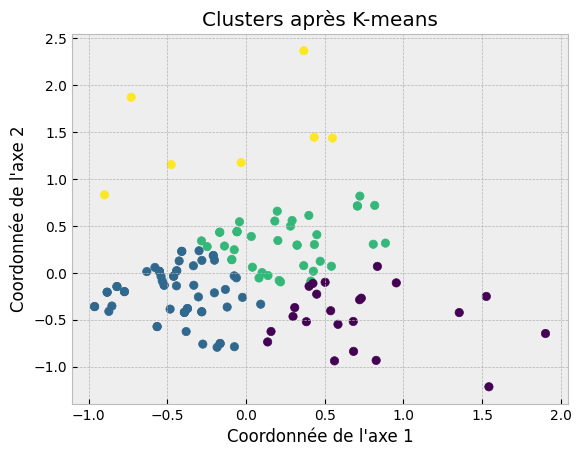

In [42]:
X = coordonnees_individues.to_numpy()
# Affichage des clusters assignés à chaque individu avec différentes couleurs
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title("Clusters après K-means")
plt.xlabel("Coordonnée de l'axe 1")
plt.ylabel("Coordonnée de l'axe 2")
plt.show()

# Analyse discriminante AFD 

In [43]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder



# Sélection des colonnes pertinentes
columns = ['Sexe', 'Votre formation', 'Niveau_detude', 'nationalite', 'traget', 'cours', 'entourage_age',
           'entourage_niveo', 'integration', 'Noter_cours', 'information_complimentaire', 'reviser_cours',
           'resumer_cours', 'faire_exercices', 'Poser_questions', 'Travailler_examens', 'rendez_vous_enseignant',
           'faire_autre_exercices', 'travailler_dur_pas_intelligent', 'essayer_choses_difficiles', 'erreur_honte_gene',
           'Jaim_dise_intelligent', 'abandonne_difficile', 'erreur_apprendre', 'jamais_doe', 'aprendre_sitravail_dure',
           'changer_inteligence', 'faire_mon_best', 'apres_diplome']  # Ajoutez ici toutes les colonnes nécessaires pour l'AFD

df_selected = df[columns]

# Encodage des variables catégorielles
encoder = LabelEncoder()
df_encoded = df_selected.apply(encoder.fit_transform)

# Séparation des caractéristiques (X) et de la variable cible (y)
X = df_encoded.drop("apres_diplome", axis=1)
y = df_encoded["apres_diplome"]

# Création de l'objet AFD et ajustement des données
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Affichage des résultats
print("Valeurs propres :", lda.explained_variance_ratio_)
print("Coefficients discriminants :", lda.coef_)


Valeurs propres : [0.46434055 0.23458622 0.15155463 0.1495186 ]
Coefficients discriminants : [[-0.21040514  0.49929011 -0.62168018  0.05760181  0.04489664 -0.06234087
  -0.12046944  0.00871845  0.08991113 -0.02248812  0.28406229 -0.15473308
  -0.15131657  0.01234943 -0.10163221  0.19888671 -0.02367346 -0.13455876
   0.16518139 -0.74995227 -0.18545022  0.17323303  0.04141395  1.10832096
  -0.73211584  0.92128055  0.5430301   0.349809  ]
 [-0.08976882 -0.11413785  1.28007567 -0.77222826  0.19555447  0.59931187
   0.35203639 -0.05248572  0.34627109  0.230096   -0.16875547  0.52452167
   0.10935431  0.05425277 -0.20518363 -0.22839216 -0.88796095 -0.07912242
   0.57246028 -0.04470635 -1.10114751  0.10916161 -1.07950365 -1.91356994
   1.1061703  -1.06668466 -1.30270116 -1.15151678]
 [ 0.92079324  0.42167508 -0.47380042  0.53109117 -0.1871607  -0.21949185
  -0.50711501  0.32804793 -0.36925314 -0.03800782 -0.18390404  0.29101901
  -0.03232734  0.04734893  0.3323657   0.03396029  0.15045058  0.

Classes attribuées aux individus :
Individu 0 : Classe Classe B
Individu 1 : Classe Classe B
Individu 2 : Classe Classe C
Individu 3 : Classe Classe B
Individu 4 : Classe Classe A
Individu 5 : Classe Classe B
Individu 6 : Classe Classe C
Individu 7 : Classe Classe C
Individu 8 : Classe Classe C
Individu 9 : Classe Classe B
Individu 10 : Classe Classe B
Individu 11 : Classe Classe B
Individu 12 : Classe Classe B
Individu 13 : Classe Classe B
Individu 14 : Classe Classe C
Individu 15 : Classe Classe D
Individu 16 : Classe Classe B
Individu 17 : Classe Classe B
Individu 18 : Classe Classe B
Individu 19 : Classe Classe B
Individu 20 : Classe Classe A
Individu 21 : Classe Classe B
Individu 22 : Classe Classe C
Individu 23 : Classe Classe A
Individu 24 : Classe Classe C
Individu 25 : Classe Classe A
Individu 26 : Classe Classe C
Individu 27 : Classe Classe C
Individu 28 : Classe Classe C
Individu 29 : Classe Classe B
Individu 30 : Classe Classe A
Individu 31 : Classe Classe B
Individu 32 : C

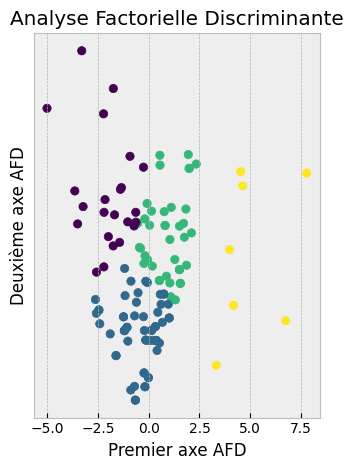

In [44]:
import matplotlib.pyplot as plt

# Assigner des classes aux clusters
classes = []
for cluster in clusters:
    if cluster == 0:
        classes.append("Classe A")
    elif cluster == 1:
        classes.append("Classe B")
    elif cluster == 2:
        classes.append("Classe C")
    elif cluster == 3:
        classes.append("Classe D")

# Affichage des classes attribuées à chaque individu
print("Classes attribuées aux individus :")
for i, class_ in enumerate(classes):
    print("Individu {} : Classe {}".format(i, class_))

# Effectuer l'analyse factorielle discriminante
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = coordonnees_individues  # Variables prédictives (coordonnées des individus dans l'espace MCA)
y = classes  # Classes attribuées par K-means
afd = LinearDiscriminantAnalysis()
afd.fit(X, y)
X_transformed = afd.transform(X)

# Créer un mapping des classes à des valeurs numériques
class_mapping = {"Classe A": 0, "Classe B": 1, "Classe C": 2, "Classe D": 3}
numeric_classes = np.array([class_mapping[c] for c in classes])

# Affichage du graphique de dispersion des individus dans l'espace AFD
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_classes)
plt.title("Analyse Factorielle Discriminante")
plt.xlabel("Premier axe AFD")
plt.ylabel("Deuxième axe AFD")
plt.yticks([])

# Afficher le graphique
plt.tight_layout()
plt.show()



# ANOVA a un facteur

## Changement de variable traget avec des valeurs numériques

In [50]:
modalites = df['traget'].unique()
print(modalites)
# Définir un dictionnaire de correspondance des modalités vers des valeurs numériques
correspondance = {'Moins de 15': 0, 'entre 15 et 30': 1, 'entre 30 et 45': 2, 'entre 45 et 60': 3, 'plus de 60': 4}

# Remplacer les modalités par des valeurs numériques
df['traget'] = df['traget'].replace(correspondance)

# Afficher les modalités converties en valeurs numériques
print(df['traget'].unique())

['Moins de 15' 'entre 15 et 30' 'entre 30 et 45' 'plus de 60'
 'entre 45 et 60']
[0 1 2 4 3]


## Affichage de boite a moustache



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


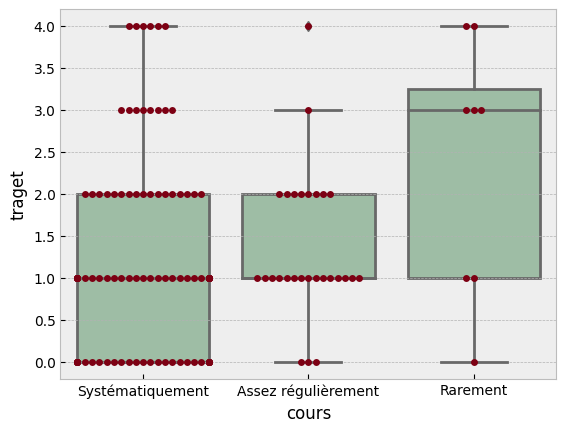

In [57]:
# Génération du boxplot et du nuage de points
# La génération du boxpot et du nuage de points
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(x='cours', y='traget', data=df, color='#99c2a2')
ax = sns.swarmplot(x='cours', y='traget', data=df, color='#7d0013')

# Affichage du graphique
plt.show()

## Analyse de relation entre présence et trajet

In [60]:
import statsmodels.api as sm  # Importer le module statsmodels.api
from statsmodels.formula.api import ols  # Importer la fonction ols du module statsmodels.formula.api

# Charger les données dans le dataframe df

# Créer le modèle OLS en spécifiant la formule
model = ols('traget ~ C(cours)', data=df).fit()
# Ici, 'traget' est la variable dépendante et 'cours' est une variable catégorielle

# Générer la table d'ANOVA
anova_table = sm.stats.anova_lm(model, typ=1)
# La fonction anova_lm() calcule la table d'ANOVA à partir du modèle OLS
# typ=1 spécifie le type d'ANOVA à effectuer (typ=1 pour l'ANOVA Type I)

# Afficher la table d'ANOVA
print(anova_table)


             df      sum_sq   mean_sq         F    PR(>F)
C(cours)    2.0    9.511986  4.755993  3.646279  0.028901
Residual  125.0  163.042702  1.304342       NaN       NaN
